# 모델 성능 평가
## 분류 모델의 평가 지표
### 예측 대상이 범주형 데이터의 경우
* 정확도
* 재현율
* 정밀도
* F1
* G
### 예측 대상이 수치형 데이터의 경우
* MSE
* RMSE
* MAE
* MAPE
* R^2

In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator

In [2]:
class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i] =1
                
        return pred

In [3]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
titanic_df = pd.read_csv('train.csv')

y_titanic_df = titanic_df['Survived']

x_titanic_df = titanic_df.drop('Survived',axis = 1)

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [7]:
digits =load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [8]:
digits.data.shape
digits.target.shape

(1797,)

In [9]:
digits.target==7

array([False, False, False, ..., False, False, False])

In [10]:
y = (digits.target == 7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=11)

In [12]:
X_train

array([[ 0.,  0.,  3., ..., 12., 14.,  7.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 16., 13.,  1.],
       [ 0.,  1., 11., ..., 13., 16.,  5.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [13]:
X_test

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 15.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.]])

In [14]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
print('y_test.shape: ',y_test.shape)
pd.Series(y_test).value_counts()

y_test.shape:  (450,)


0    405
1     45
dtype: int64

In [17]:
fake_cl = MyFakeClassifier()
fake_cl.fit(X_train,y_train)
fakePred = fake_cl.predict(X_test)
accuracy= accuracy_score(y_test,fakePred)
print('정확도 : ',np.round((accuracy),3))


정확도 :  0.9


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,fakePred)
# TN FP
# FN TP

array([[405,   0],
       [ 45,   0]], dtype=int64)

정밀도: 양성 예측도 precision_score\
재현율: 민감도 실제 양품/실제상품

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

    
digits = load_digits()
y=(digits.target ==1).astype(int)
X_train,X_test,y_train,y_test =train_test_split(digits.data,y,random_state=11)
fakeclf=MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred=fakeclf.predict(X_test)

In [20]:
fakepred.astype(int).sum()

0

In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print('정밀도: ',precision_score(y_test,fakepred))
print('재현율: ',recall_score(y_test,fakepred))

정밀도:  0.0
재현율:  0.0


C:\Users\SEC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision =precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 {0:.3f}, 정밀도 {1:.3f}, 재현율 {2:.3f}'.format(accuracy,precision,recall))

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('train.csv')

y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived',axis = 1)
x_titanic_df = transform_features(x_titanic_df)

x_train,x_test,y_train,y_test = train_test_split(x_titanic_df,y_titanic_df,
                                                 test_size=0.2,random_state=11)


lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
pred=lr_clf.predict(x_test)
print('로지스틱 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

get_clf_eval(y_test,pred)

로지스틱 정확도 : 0.8492
오차행렬
[[104  14]
 [ 13  48]]
정확도 0.849, 정밀도 0.774, 재현율 0.787


C:\Users\SEC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
pred_proba = lr_clf.predict_proba(x_test)
pred_proba[:10]

array([[0.46162417, 0.53837583],
       [0.87858538, 0.12141462],
       [0.87723741, 0.12276259],
       [0.8828518 , 0.1171482 ],
       [0.85504601, 0.14495399],
       [0.88231296, 0.11768704],
       [0.88835481, 0.11164519],
       [0.20912571, 0.79087429],
       [0.782527  , 0.217473  ],
       [0.37000292, 0.62999708]])

In [25]:
from sklearn.preprocessing import Binarizer
X=[[0.5,-1,2],[2,0,0],[0,1.1,1.2]]
binarizer = Binarizer(threshold=1.0)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


In [26]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측')
print(pred_proba_result[:10])

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
[[0.46162417 0.53837583 1.        ]
 [0.87858538 0.12141462 0.        ]
 [0.87723741 0.12276259 0.        ]
 [0.8828518  0.1171482  0.        ]
 [0.85504601 0.14495399 0.        ]
 [0.88231296 0.11768704 0.        ]
 [0.88835481 0.11164519 0.        ]
 [0.20912571 0.79087429 1.        ]
 [0.782527   0.217473   0.        ]
 [0.37000292 0.62999708 1.        ]]


In [27]:
c_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 0.849, 정밀도 0.774, 재현율 0.787


### 분류모형의 임계값을 0.4로 

In [28]:
c_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[99 19]
 [10 51]]
정확도 0.838, 정밀도 0.729, 재현율 0.836


In [29]:
thresholds=[0.4,0.45,0.50,0.55,0.60]
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ',custom_threshold)
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba_1,thresholds)

임계값:  0.4
오차행렬
[[99 19]
 [10 51]]
정확도 0.838, 정밀도 0.729, 재현율 0.836
임계값:  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 0.849, 정밀도 0.766, 재현율 0.803
임계값:  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 0.849, 정밀도 0.774, 재현율 0.787
임계값:  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 0.866, 정밀도 0.836, 재현율 0.754
임계값:  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 0.877, 정밀도 0.882, 재현율 0.738


In [30]:
from sklearn.metrics import precision_recall_curve
# 정밀도 재현율 임계값 리턴
pred_proba_class1=lr_clf.predict_proba(x_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print('임계값 shape: ',thresholds.shape)
print('정밀도 shape: ',precisions.shape)
print('재현율 shape: ',recalls.shape)

idx=np.arange(0,thresholds.shape[0],15)
print('sample index: ',idx)
print('임계값 sample: ',thresholds[idx])
print('정밀도 sample: ',precisions[idx])
print('재현율 sample: ',recalls[idx])

임계값 shape:  (143,)
정밀도 shape:  (144,)
재현율 shape:  (144,)
sample index:  [  0  15  30  45  60  75  90 105 120 135]
임계값 sample:  [0.10396312 0.12141462 0.14031174 0.18632044 0.28073903 0.40395622
 0.56489504 0.66698944 0.82213043 0.94732233]
정밀도 sample:  [0.38853503 0.44029851 0.46610169 0.53921569 0.64705882 0.72857143
 0.83636364 0.94871795 0.95833333 1.        ]
재현율 sample:  [1.         0.96721311 0.90163934 0.90163934 0.90163934 0.83606557
 0.75409836 0.60655738 0.37704918 0.14754098]


In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    start,end=plt.xlim()
    
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

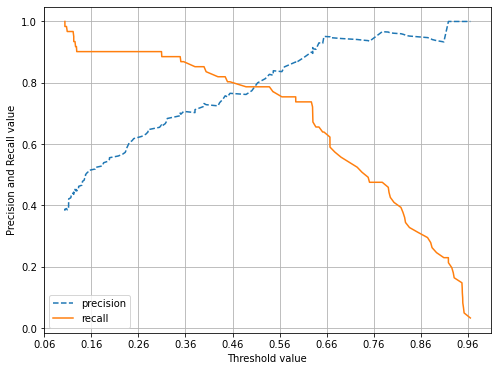

In [32]:
precision_recall_curve_plot(y_test,pred_proba[:,1])

### F1 Score

#### F1 Score 
* 정밀도와 재현율의 조화평균
* 정밀도와 재현율의 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때, 상대적으로 높은 값을 가짐

F1 Score =$2*\frac{Precision*Recall}{Precision+Recall}$ 


In [33]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision =precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도 {0:.3f}, 정밀도 {1:.3f}, 재현율 {2:.3f} ,F1 {3:.3f}'.format(accuracy,precision,recall,f1))

In [34]:
from sklearn.metrics import f1_score

In [36]:
thresholds=[0.4,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict(x_test)
get_eval_by_threshold(y_test,pred_proba_1,thresholds)

임계값:  0.4
오차행렬
[[99 19]
 [10 51]]
정확도 0.838, 정밀도 0.729, 재현율 0.836 ,F1 0.779
임계값:  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 0.849, 정밀도 0.766, 재현율 0.803 ,F1 0.784
임계값:  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 0.849, 정밀도 0.774, 재현율 0.787 ,F1 0.780
임계값:  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 0.866, 정밀도 0.836, 재현율 0.754 ,F1 0.793
임계값:  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 0.877, 정밀도 0.882, 재현율 0.738 ,F1 0.804


### G measure
* 정밀도와 재현율의 기하평균
* $G = \sqrt(Recall*Precision) $\
성능평가지표는 하나만 쓰지 않는다.

### ROC Curve와 AUC

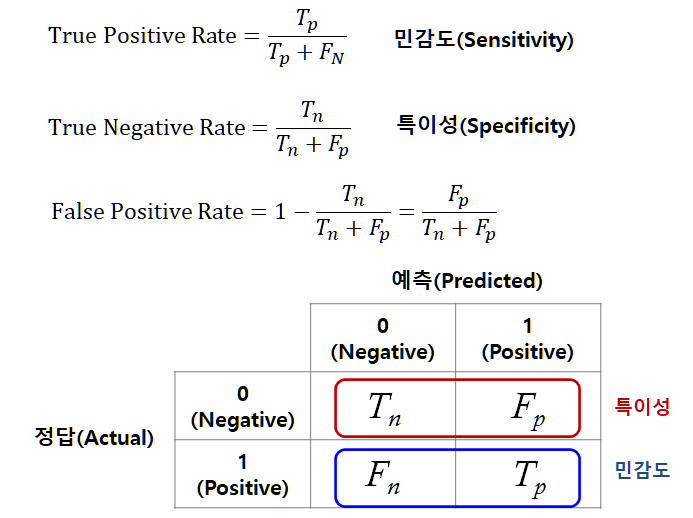

In [39]:
from sklearn.metrics import roc_curve,roc_auc_score
pred_proba_class1=lr_clf.predict_proba(x_test)[:,1]

fprs,tprs,threshold = roc_curve(y_test,pred_proba_class1)

thr_index = np.arange(1,threshold.shape[0],5)

print('샘플 추출을 위한 임계값 배열의 index: ',thr_index)
print('샘플용 임계값: ',np.round(thresholds[thr_index],2))

print('샘플 임계값별 FPR: ',np.round(fprs[thr_index],3))
print('샘플 임계값별 TPR: ',np.round(tprs[thr_index],3))

샘플 추출을 위한 임계값 배열의 index:  [ 1  6 11 16 21 26 31 36 41 46 51]


TypeError: only integer scalar arrays can be converted to a scalar index

In [40]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs, tprs, label='ROC')
    
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

In [41]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

ValueError: X has 64 features per sample; expecting 8

In [42]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision =precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    
    print('오차행렬')
    print(confusion)
    print('정확도 {0:.3f}, 정밀도 {1:.3f}, 재현율 {2:.3f} ,F1 {3:.3f},AUC {4:.3f}'
          .format(accuracy,precision,recall,f1,roc_auc))

Q1. A:0.90 B:0.90\
Q2. A:0.90 B:5/6\
Q3. A:0.90 B:1.00\
Q4. A:4,500원 B:10000원\
Q5. A:2,000원 B: 8,000원

In [43]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)


In [46]:
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

ValueError: X has 64 features per sample; expecting 8